<a href="https://colab.research.google.com/github/loulblemo/colab_diffusers_finetuning/blob/main/diffusion_finetune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install git+https://github.com/huggingface/diffusers.git
!pip install accelerate
!pip install datasets
!pip install bitsandbytes

In [2]:
%env MODEL_NAME=stabilityai/stable-diffusion-2-1

env: MODEL_NAME=stabilityai/stable-diffusion-2-1


In [3]:
import os
import torch

from diffusers import StableDiffusionPipeline
from diffusers import DiffusionPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [4]:
def plot_images(images):
    from matplotlib import pyplot as plt
    plt.figure()
    f, axarr = plt.subplots(1, len(images), figsize=(20,10))
    for ax, img in zip(axarr.flatten(), images):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

In [5]:
pipe = StableDiffusionPipeline.from_pretrained(os.getenv('MODEL_NAME'), torch_dtype=torch.float16)
pipe = pipe.to("cuda")
prompt = "a picture of an elf sorcerer"
images = pipe(prompt, num_images_per_prompt=6).images

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

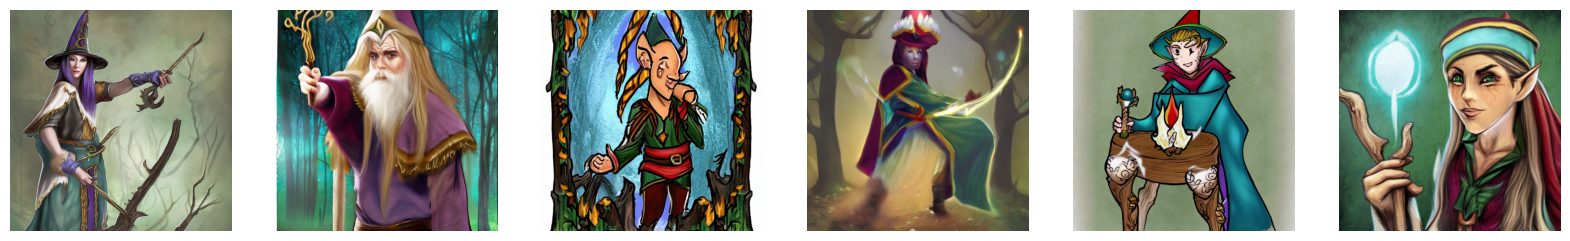

In [6]:
plot_images(images)

In [7]:
# Flush the GPU memory to be able to run the training
del pipe
del images

In [8]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [9]:
!git clone https://huggingface.co/datasets/0xJustin/Dungeons-and-Diffusion
!git clone https://github.com/huggingface/diffusers.git

Cloning into 'Dungeons-and-Diffusion'...
remote: Enumerating objects: 922, done.
remote: Total 922 (delta 0), reused 0 (delta 0), pack-reused 922 (from 1)
Receiving objects: 100% (922/922), 138.48 KiB | 13.85 MiB/s, done.
Resolving deltas: 100% (20/20), done.
Filtering content: 100% (1199/1199), 497.11 MiB | 7.12 MiB/s, done.
Cloning into 'diffusers'...
remote: Enumerating objects: 61402, done.
remote: Counting objects: 100% (15132/15132), done.
remote: Compressing objects: 100% (1260/1260), done.
remote: Total 61402 (delta 14549), reused 13979 (delta 13828), pack-reused 46270
Receiving objects: 100% (61402/61402), 41.73 MiB | 16.58 MiB/s, done.
Resolving deltas: 100% (45065/45065), done.


In [12]:
%env dataset_name=Dungeons-and-Diffusion
%env max_training_epochs = 250

env: dataset_name=Dungeons-and-Diffusion
env: max_training_epochs=250


In [13]:
!accelerate launch diffusers/examples/text_to_image/train_text_to_image.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --dataset_name=$dataset_name \
  --use_ema \
  --use_8bit_adam \
  --resolution=512 --center_crop --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --mixed_precision="fp16" \
  --max_train_steps=$max_training_epochs \
  --learning_rate=1e-05 \
  --max_grad_norm=1 \
  --lr_scheduler="constant" --lr_warmup_steps=0 \
  --output_dir="dnd-model"

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2024-05-02 11:32:46.285231: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-02 11:32:46.285282: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-02 11:32:46.383514: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has alread

In [14]:
pipe = StableDiffusionPipeline.from_pretrained('dnd-model', torch_dtype=torch.float16)
pipe = pipe.to("cuda")
prompt = "a picture of an elf sorcerer"
images = pipe(prompt, num_images_per_prompt=6).images

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

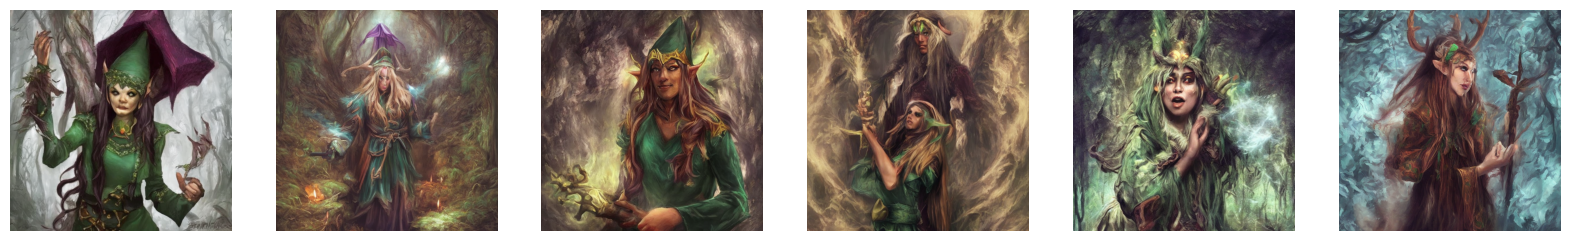

In [15]:
plot_images(images)